In [1]:
import pandas as pd
import matplotlib.pyplot as plt

with open('IXAXOR2.BFC', 'r') as file:
    lines = file.readlines()

column_headers = lines[11].split('\t')[1:-1]
data = []

for line in lines[12:]:
    if line.strip():
        if "EOD" in line:
            break
        values = line.split('\t')
        data.append(values)

columns = ["Wavelength"] + column_headers
data = [[float(value) if value else None for value in row] for row in data]
df = pd.DataFrame(data, columns=columns)

df.set_index("Wavelength", inplace=True)

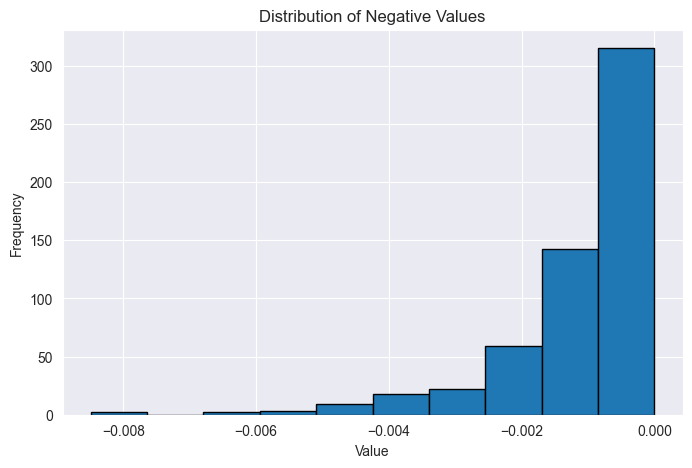

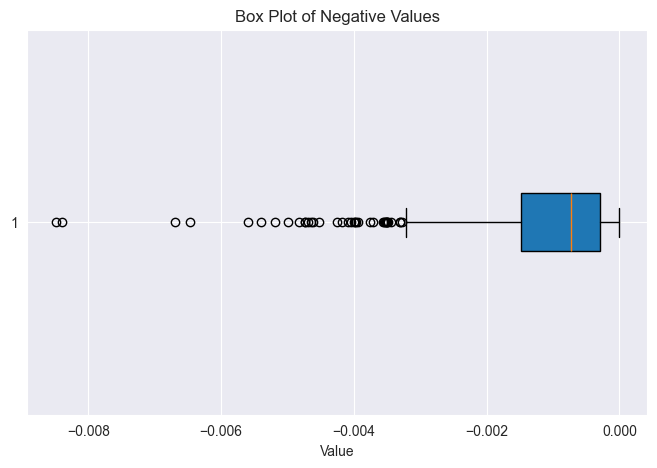

In [2]:
negative_values = df[df < 0].stack()

plt.figure(figsize=(8, 5))
plt.hist(negative_values, bins=10, edgecolor='black')
plt.title("Distribution of Negative Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.boxplot(negative_values, vert=False, patch_artist=True)
plt.title("Box Plot of Negative Values")
plt.xlabel("Value")
plt.grid(True)
plt.show()


In [2]:
# Column sums
print(df.sum())

300    0.073362
310    0.223983
320    0.234504
330    0.270302
340    0.152762
350    0.188894
360    0.213317
370    0.208888
380    0.533826
390    0.476620
400    0.517205
410    0.463251
420    0.526260
430    0.495010
440    0.656057
450    0.624216
460    0.526961
470    0.615500
480    0.645072
490    0.724222
500    0.645386
510    0.638762
520    0.511073
530    0.620002
540    0.572297
550    0.744367
560    0.543583
570    0.633661
580    0.758174
590    0.770703
600    0.916242
610    0.857289
620    0.855824
630    0.885901
640    0.818516
650    0.907025
660    0.816873
670    0.826342
680    0.860744
690    0.871591
700    0.916069
710    0.870587
720    0.882507
730    0.880974
740    0.873671
750    0.850074
760    0.875804
770    0.851693
780    0.882157
dtype: float64


In [3]:
#Make all the values non-zero
non_negative_df = df.clip(lower = 0)

In [4]:
non_negative_df.sum()

300    0.170493
310    0.226843
320    0.234896
330    0.270302
340    0.165967
350    0.221221
360    0.236366
370    0.232740
380    0.543826
390    0.485563
400    0.518712
410    0.471127
420    0.527304
430    0.511313
440    0.656057
450    0.625617
460    0.553131
470    0.618625
480    0.645176
490    0.724222
500    0.647120
510    0.641077
520    0.557880
530    0.624707
540    0.593632
550    0.744367
560    0.592110
570    0.646056
580    0.759338
590    0.789690
600    0.916332
610    0.864204
620    0.867541
630    0.890177
640    0.852050
650    0.909530
660    0.857414
670    0.858345
680    0.866724
690    0.876986
700    0.918567
710    0.876377
720    0.885408
730    0.885337
740    0.880347
750    0.864153
760    0.881021
770    0.867396
780    0.884009
dtype: float64

In [5]:
df_diagonal_zero = non_negative_df.copy()
for index in df_diagonal_zero.index:
    idx = str(index)[:-2]
    df_diagonal_zero.loc[index, idx] = 0

In [6]:
df_diagonal_zero

,300,310,320,330,340,350,360,370,380,390,...,690,700,710,720,730,740,750,760,770,780
Wavelength,,,,,,,,,,,,,,,,,,,,,
380.0,0.000000,0.000515,0.004577,0.002520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002940,0.000574,0.001753,0.000000,0.000047,0.000000,0.000340,0.001116,0.000000
390.0,0.000000,0.000000,0.001492,0.000979,0.000000,0.000000,0.000000,0.000000,0.000145,0.000000,...,0.000762,0.001491,0.000000,0.000844,0.000309,0.000118,0.000000,0.000000,0.000909,0.000234
400.0,0.000000,0.000237,0.002203,0.001991,0.000000,0.000000,0.000000,0.000000,0.000000,0.001466,...,0.000117,0.001026,0.000281,0.001255,0.000296,0.000567,0.000000,0.000000,0.000834,0.000402
410.0,0.000000,0.000000,0.001784,0.003496,0.000066,0.000000,0.000000,0.000000,0.000000,0.001382,...,0.000352,0.001130,0.000000,0.001346,0.001019,0.000000,0.000000,0.000000,0.000461,0.000460
420.0,0.000000,0.000000,0.001679,0.003164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000551,...,0.000885,0.001079,0.000276,0.001160,0.000751,0.000000,0.000000,0.000379,0.000150,0.000161
430.0,0.000000,0.000000,0.000000,0.003142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000606,...,0.001071,0.000585,0.000334,0.000993,0.000696,0.000145,0.000000,0.000284,0.000479,0.000166
440.0,0.000000,0.000000,0.000850,0.002911,0.000000,0.000000,0.000000,0.000000,0.000404,0.000020,...,0.000365,0.000898,0.000294,0.000750,0.000329,0.000051,0.000000,0.000154,0.000000,0.000332
450.0,0.000000,0.000000,0.000779,0.001003,0.000000,0.000000,0.000000,0.000322,0.000000,0.000579,...,0.000513,0.000560,0.000000,0.000708,0.000570,0.000430,0.000000,0.000066,0.000000,0.000236
460.0,0.000000,0.000731,0.000608,0.001494,0.000000,0.000000,0.000140,0.000445,0.000219,0.000454,...,0.000634,0.000726,0.000000,0.000413,0.000000,0.000598,0.000000,0.000014,0.000000,0.000072


In [7]:
print(df_diagonal_zero.sum())

300    0.170493
310    0.226843
320    0.234896
330    0.270302
340    0.165967
350    0.221221
360    0.236366
370    0.232740
380    0.330470
390    0.311069
400    0.373393
410    0.349280
420    0.414516
430    0.406245
440    0.546168
450    0.506909
460    0.417551
470    0.446528
480    0.433344
490    0.510967
500    0.459011
510    0.480098
520    0.445146
530    0.537312
540    0.509210
550    0.620800
560    0.426625
570    0.424138
580    0.407541
590    0.226732
600    0.176744
610    0.047645
620    0.025943
630    0.040488
640    0.007108
650    0.055657
660    0.004980
670    0.004929
680    0.014122
690    0.020987
700    0.063163
710    0.012428
720    0.038307
730    0.021622
740    0.018453
750    0.005760
760    0.011194
770    0.026182
780    0.019605
dtype: float64


In [8]:
df_smaller_wavelengths_zero = non_negative_df.copy()
for index in df_smaller_wavelengths_zero.index:
    idx = str(index)[:-2]
    while True:
        if idx in df_smaller_wavelengths_zero.columns:
            df_smaller_wavelengths_zero.loc[index, idx] = 0
            idx = str(int(idx) + 10)
        else:
            break

In [9]:
df_smaller_wavelengths_zero

,300,310,320,330,340,350,360,370,380,390,...,690,700,710,720,730,740,750,760,770,780
Wavelength,,,,,,,,,,,,,,,,,,,,,
380.0,0.000000,0.000515,0.004577,0.002520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
390.0,0.000000,0.000000,0.001492,0.000979,0.000000,0.000000,0.000000,0.000000,0.000145,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
400.0,0.000000,0.000237,0.002203,0.001991,0.000000,0.000000,0.000000,0.000000,0.000000,0.001466,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
410.0,0.000000,0.000000,0.001784,0.003496,0.000066,0.000000,0.000000,0.000000,0.000000,0.001382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
420.0,0.000000,0.000000,0.001679,0.003164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
430.0,0.000000,0.000000,0.000000,0.003142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
440.0,0.000000,0.000000,0.000850,0.002911,0.000000,0.000000,0.000000,0.000000,0.000404,0.000020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
450.0,0.000000,0.000000,0.000779,0.001003,0.000000,0.000000,0.000000,0.000322,0.000000,0.000579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
460.0,0.000000,0.000731,0.000608,0.001494,0.000000,0.000000,0.000140,0.000445,0.000219,0.000454,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [10]:
print(df_smaller_wavelengths_zero.sum())

300    0.170493
310    0.226843
320    0.234896
330    0.270302
340    0.165967
350    0.221221
360    0.236366
370    0.232740
380    0.330470
390    0.311069
400    0.373278
410    0.346143
420    0.408743
430    0.406206
440    0.527395
450    0.487853
460    0.416187
470    0.429541
480    0.420872
490    0.479320
500    0.454274
510    0.476430
520    0.445146
530    0.526941
540    0.508936
550    0.578486
560    0.425401
570    0.410160
580    0.371972
590    0.185171
600    0.103877
610    0.015016
620    0.005435
630    0.011267
640    0.000000
650    0.021325
660    0.000000
670    0.000026
680    0.001238
690    0.004122
700    0.016007
710    0.003583
720    0.005219
730    0.004247
740    0.001234
750    0.000000
760    0.001145
770    0.000000
780    0.000000
dtype: float64


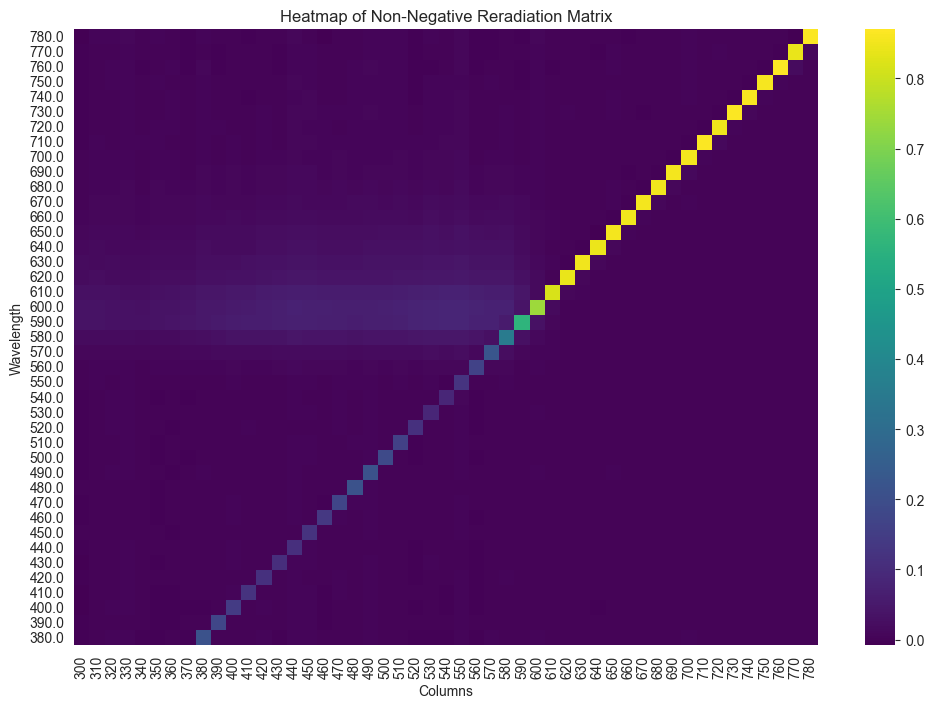

In [11]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df[::-1], cmap="viridis", cbar=True)
plt.title("Heatmap of Non-Negative Reradiation Matrix")
plt.xlabel("Columns")
plt.ylabel("Wavelength")
plt.show()

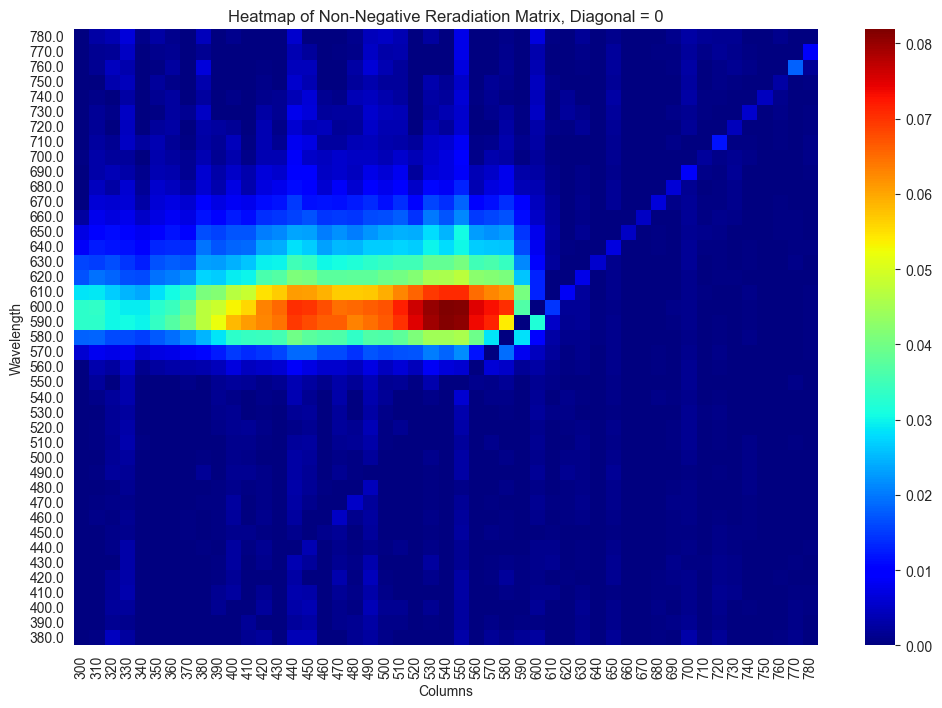

In [12]:
import seaborn as sns

cmap = plt.get_cmap('jet')

plt.figure(figsize=(12, 8))
sns.heatmap(df_diagonal_zero.iloc[::-1],cbar=True, cmap='jet', vmin=0.0)
plt.title("Heatmap of Non-Negative Reradiation Matrix, Diagonal = 0")
plt.xlabel("Columns")
plt.ylabel("Wavelength")
plt.show()

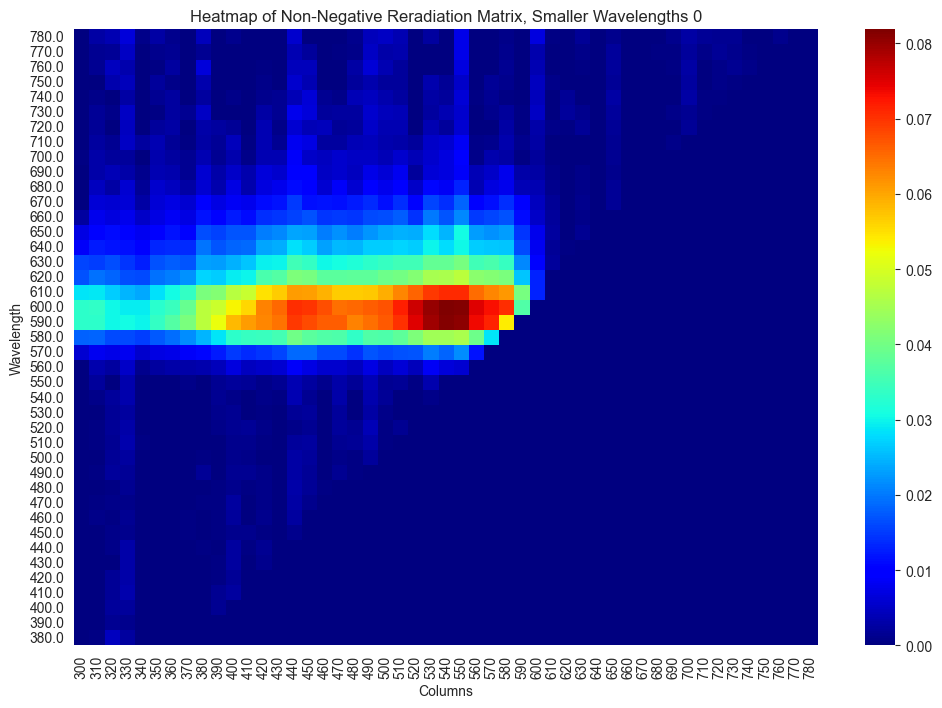

In [13]:
import seaborn as sns

cmap = plt.get_cmap('jet')

plt.figure(figsize=(12, 8))
sns.heatmap(df_smaller_wavelengths_zero.iloc[::-1],cbar=True, cmap='jet', vmin=0.0)
plt.title("Heatmap of Non-Negative Reradiation Matrix, Smaller Wavelengths 0")
plt.xlabel("Columns")
plt.ylabel("Wavelength")
plt.show()

In [14]:
import sys
print(sys.path)
sys.path.append('/Users/tugba/Desktop/deney/mitsuba3/build/python')

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Users/tugba/Desktop/deney/mitsuba3', '/Users/tugba/.pyenv/versions/3.12.6/lib/python312.zip', '/Users/tugba/.pyenv/versions/3.12.6/lib/python3.12', '/Users/tugba/.pyenv/versions/3.12.6/lib/python3.12/lib-dynload', '', '/Users/tugba/Desktop/mitsuba3/venv/lib/python3.12/site-packages', '/Users/tugba/Desktop/mitsuba3/venv/lib/python3.12/site-packages/setuptools/_vendor']


In [15]:
import mitsuba as mi 
import drjit as dr 
import numpy as np
from matplotlib import pyplot as plt
mi.set_variant("llvm_ad_rgb")

In [16]:
sampling_df = non_negative_df.copy()
for index in sampling_df.index:
    idx = str(index)[:-2]
    while True:
        idx = str(int(idx) + 10)
        if idx in sampling_df.columns:
            sampling_df.loc[index, idx] = 0
        else:
            break

In [17]:
pdf = sampling_df.values.transpose()
pdf = pdf / np.sum(pdf, axis = 1)[:,np.newaxis]
cdf = np.cumsum(pdf, axis = 1) / np.sum(pdf, axis = 1)[:,np.newaxis]
# Add zero values to the beginning of the cdf.
cdf = np.hstack([np.zeros([pdf.shape[0],1]), cdf])

In [18]:
sampling_df

,300,310,320,330,340,350,360,370,380,390,...,690,700,710,720,730,740,750,760,770,780
Wavelength,,,,,,,,,,,,,,,,,,,,,
380.0,0.000000,0.000515,0.004577,0.002520,0.000000,0.000000,0.000000,0.000000,0.213356,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
390.0,0.000000,0.000000,0.001492,0.000979,0.000000,0.000000,0.000000,0.000000,0.000145,0.174494,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
400.0,0.000000,0.000237,0.002203,0.001991,0.000000,0.000000,0.000000,0.000000,0.000000,0.001466,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
410.0,0.000000,0.000000,0.001784,0.003496,0.000066,0.000000,0.000000,0.000000,0.000000,0.001382,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
420.0,0.000000,0.000000,0.001679,0.003164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
430.0,0.000000,0.000000,0.000000,0.003142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
440.0,0.000000,0.000000,0.000850,0.002911,0.000000,0.000000,0.000000,0.000000,0.000404,0.000020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
450.0,0.000000,0.000000,0.000779,0.001003,0.000000,0.000000,0.000000,0.000322,0.000000,0.000579,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
460.0,0.000000,0.000731,0.000608,0.001494,0.000000,0.000000,0.000140,0.000445,0.000219,0.000454,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [19]:
pdf = mi.TensorXf(pdf)
cdf = mi.TensorXf(cdf)

In [20]:
pdf

[[0, 0, 0, .. 35 skipped .., 0, 0, 0],
 [0.00226866, 0, 0.00104429, .. 35 skipped .., 0.00693199, 0.00589188, 0.0123222],
 [0.0194834, 0.00635186, 0.00937796, .. 35 skipped .., 0.0193589, 0.00715328, 0.0157048],
 .. 43 skipped ..,
 [0, 0, 0, .. 35 skipped .., 0.998685, 0, 0.00131486],
 [0, 0, 0, .. 35 skipped .., 0, 1, 0],
 [0, 0, 0, .. 35 skipped .., 0, 0, 1]]

In [21]:
pdf.shape

(49, 41)

In [22]:
a = mi.WavelengthDistribution(pdf)

In [23]:
@dr.syntax
def eval_pdf(incoming, outgoing = mi.Float(380)):
    pdf_index = dr.floor((incoming - 300) / 10)
    col_index = dr.floor((outgoing - 380) / 10)
    
    n = pdf.shape[1]
    
    top_left = n * pdf_index + col_index
    top_right = n * pdf_index + col_index + 1
    bottom_left = n * (pdf_index + 1) + col_index
    bottom_right = n * (pdf_index + 1) + col_index + 1
    
    incoming_mod = incoming - dr.floor(incoming / 10.0) * 10.0
    outgoing_mod = outgoing - dr.floor(outgoing / 10.0) * 10.0

    return (
        (10 - incoming_mod) *
        (
            (10 - outgoing_mod) * dr.gather(mi.Float, pdf.array, top_left) +
            outgoing_mod * dr.gather(mi.Float, pdf.array, top_right)
        ) / 10 +
        incoming_mod *
        (
            (10 - outgoing_mod) * dr.gather(mi.Float, pdf.array, bottom_left) +
            outgoing_mod * dr.gather(mi.Float, pdf.array, bottom_right)
        ) / 10
    ) / 100

@dr.syntax
def eval_cdf(incoming, outgoing = mi.Float(380)):
    cdf_index = dr.floor((incoming - 300) / 10)
    col_index = dr.floor((outgoing - 380) / 10)
    
    n = cdf.shape[1]
    
    top_left = n * cdf_index + col_index
    top_right = n * cdf_index + col_index + 1
    bottom_left = n * (cdf_index + 1) + col_index
    bottom_right = n * (cdf_index + 1) + col_index + 1
    
    incoming_mod = incoming - dr.floor(incoming / 10.0) * 10.0
    outgoing_mod = outgoing - dr.floor(outgoing / 10.0) * 10.0

    return (
        (10 - incoming_mod) *
        (
            (10 - outgoing_mod) * dr.gather(mi.Float, cdf.array, top_left) +
            outgoing_mod * dr.gather(mi.Float, cdf.array, top_right)
        ) / 10 +
        incoming_mod *
        (
            (10 - outgoing_mod) * dr.gather(mi.Float, cdf.array, bottom_left) +
            outgoing_mod * dr.gather(mi.Float, cdf.array, bottom_right)
        ) / 10
    ) / 10

@dr.syntax
def sample(sample : mi.Float, incoming = mi.Float(300)):
    # Run bisection to apply inverse cdf.
    n = pdf.shape[1]
    low = dr.zeros(mi.UInt32, dr.width(sample))
    high = dr.ones(mi.UInt32, dr.width(sample)) * n

    # We first find the correct bin to sample from.
    while (low+1) < high:
        middle =  (low + high) // 2
        # Evaluate the cdf for the corresponding distributions.
        cdf_val = eval_cdf(incoming, mi.Float(380 + middle * 10))
        
        if sample < cdf_val:
            high = middle
        else:
            low = middle

    cdf_low = eval_cdf(incoming, mi.Float(380 + low * 10))
    print(cdf_low)
    print(low)
    
    cdf_high = eval_cdf(incoming, mi.Float(380 + (low + 1) * 10))
    print(cdf_high)
    
    residual = sample - cdf_low
    return 380 + ((mi.Float(low) + residual / (cdf_high - cdf_low)) * 10)

In [24]:
outgoing = dr.arange(mi.Float, 760, 1561, 1) / 2
incoming = dr.ones(mi.Float, len(outgoing)) * 392
pdf_vals = eval_pdf(incoming, outgoing)
cdf_vals = eval_cdf(incoming, outgoing)

In [54]:
pdf_cpp = a.eval((incoming, outgoing))

In [27]:
pdf_vals

[0, 0.00143746, 0.00287491, .. 795 skipped .., 4.46302e-05, 4.66045e-05, 4.85788e-05]

In [55]:
pdf_cpp

[0, 0.00143746, 0.00287491, .. 795 skipped .., 4.46303e-05, 4.66046e-05, 4.8579e-05]

Text(0.5, 1.0, 'CDF')

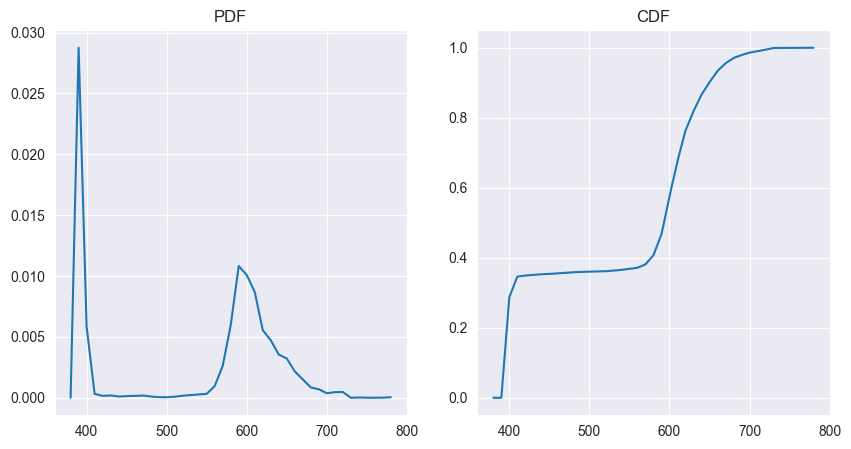

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.plot(outgoing.numpy(), pdf_vals.numpy())
ax2.plot(outgoing.numpy(), cdf_vals.numpy())
ax1.set_title("PDF")
ax2.set_title("CDF")

In [56]:
n_points = 100000
sampler = mi.PCG32(n_points)
index = dr.ones(mi.Float, n_points) * 392
sampled = sample(sampler.next_float32(), incoming = index)

[0, 0.466924, 0, .. 99994 skipped .., 0.407205, 0.933478, 0]
[1, 21, 1, .. 99994 skipped .., 20, 28, 1]
[0.287491, 0.575189, 0.287491, .. 99994 skipped .., 0.466924, 0.955187, 0.287491]


In [57]:
sampled_cpp = a.sample((index, sampler.next_float32()))[0]

[0.901208, 0.287491, 0.466924, 0.676016, 0.575189,    99990 skipped .., 0.466924, 0, 0.466924, 0.466924, 0.762951]
[0.933478, 0.345949, 0.575189, 0.762951, 0.676016,    99990 skipped .., 0.575189, 0.287491, 0.575189, 0.575189, 0.818494]


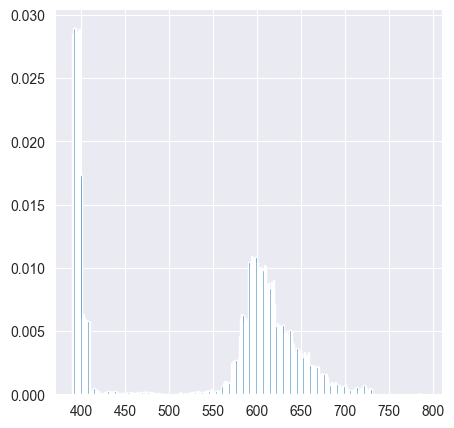

In [58]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.hist(np.array(sampled_cpp), bins = 300, density=True);

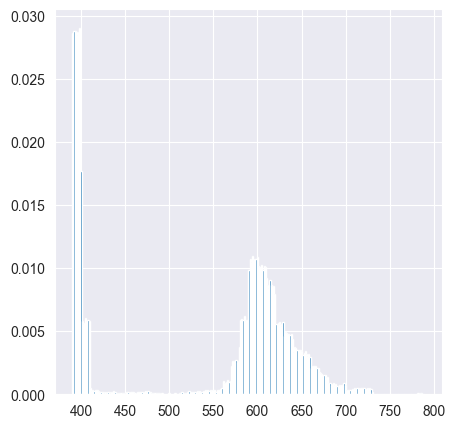

In [59]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.hist(sampled.numpy(), bins = 300, density=True);

Text(0.5, 1.0, 'PDF and the corresponding histogram')

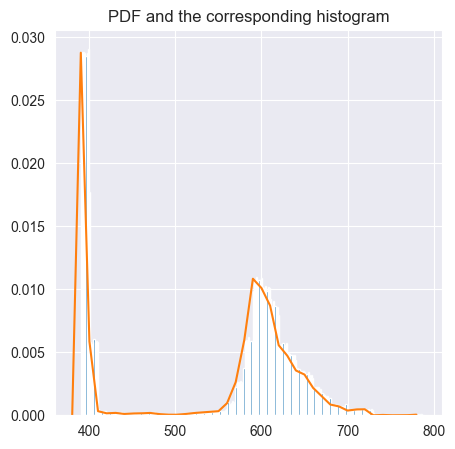

In [60]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
ax.hist(sampled.numpy(), bins = 300, density = True);
ax.plot(outgoing.numpy(), pdf_vals.numpy())
ax.set_title("PDF and the corresponding histogram")